In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
from readers.InSAR import InSAR
from readers.GNSS import GNSS

In [3]:
insar = InSAR('data/time_series_Saarland_Orbit139_update.nc')
gnss = GNSS('data/selected_stations_dates.csv')

In [4]:
gnss.get_df()

site  YYMMMDD  yyyy.yyyy  __MJD  week  d  reflon  _e0(m)  __east(m)  \
0      BAS4  15NOV27  2015.9042  57353  1872  5     5.9    2840   0.335746   
1      BAS4  15NOV28  2015.9069  57354  1872  6     5.9    2840   0.338036   
2      BAS4  15NOV29  2015.9097  57355  1873  0     5.9    2840   0.334461   
3      BAS4  15NOV30  2015.9124  57356  1873  1     5.9    2840   0.334722   
4      BAS4  15DEC01  2015.9151  57357  1873  2     5.9    2840   0.335756   
...     ...      ...        ...    ...   ... ..     ...     ...        ...   
49412  WALF  20FEB18  2020.1314  58897  2093  2     6.1    2280   0.337429   
49413  WALF  20FEB19  2020.1342  58898  2093  3     6.1    2280   0.337969   
49414  WALF  20FEB20  2020.1369  58899  2093  4     6.1    2280   0.338318   
49415  WALF  20FEB21  2020.1396  58900  2093  5     6.1    2280   0.338762   
49416  WALF  20FEB22  2020.1424  58901  2093  6     6.1    2280   0.338489   

       ____n0(m)  ...  sig_e(m)  sig_n(m)  sig_u(m)  __corr_en  __corr_eu  \
0        5492790  ...  0.000734  0.000973  0.003001   0.008320  -0.051890   
1        5492790  ...  0.000746  0.000984  0.003059   0.017230  -0.067490   
2        5492790  ...  0.000736  0.000981  0.003027   0.006314  -0.038736   
3        5492790  ...  0.000741  0.000988  0.003060   0.007693  -0.037520   
4        5492790  ...  0.000733  0.000978  0.003016   0.019456  -0.063112   
...          ...  ...       ...       ...       ...        ...        ...   
49412    5502823  ...  0.000698  0.000960  0.002851  -0.008958   0.001673   
49413    5502823  ...  0.000702  0.000971  0.002894  -0.004305   0.009617   
49414    5502823  ...  0.000715  0.000988  0.002999  -0.033000   0.015142   
49415    5502823  ...  0.000707  0.000980  0.002940  -0.032729   0.014884   
49416    5502823  ...  0.000703  0.000961  0.002883  -0.001912   0.018324   

       __corr_nu  _latitude(deg)  _longitude(deg)  __height(m)   day  
0      -0.051327       49.567937         5.939266    375.75093  5809  
1      -0.044838       49.567937         5.939266    375.74875  5810  
2      -0.063397       49.567937         5.939266    375.74933  5811  
3      -0.062460       49.567937         5.939266    375.74901  5812  
4      -0.056829       49.567937         5.939266    375.74651  5813  
...          ...             ...              ...          ...   ...  
49412  -0.046057       49.658142         6.131582    292.40167  7353  
49413  -0.027913       49.658142         6.131582    292.41336  7354  
49414  -0.018189       49.658142         6.131582    292.41906  7355  
49415   0.000672       49.658142         6.131582    292.39791  7356  
49416  -0.045957       49.658142         6.131582    292.38956  7357  

[49417 rows x 24 columns]

In [5]:
master_day = insar.get_master_day()
gnss.compute_standarized_dataset_up(master_day)

/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: BIWI does not have data for 6625. Using closest day 6624 instead.
/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: D525 does not have data for 6625. Using closest day 5920 instead.
/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: LUX1 does not have data for 6625. Using closest day 6820 instead.
/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: MOLV does not have data for 6625. Using closest day 6624 instead.
/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: MOUS does not have data for 6625. Using closest day 6624 instead.
/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: OBER does not have data for 6625. Using closest day 6624 instead.
/cluster/home/jlucki/DSL/insar-super-resolution/readers/GNSS.py:91: UserWarning: SIM1 does not have data for 6625. Usi

In [6]:
gnss.compute_and_remove_outliers()

In [7]:
gnss.compute_periodic_function(use_sigma=True)

In [8]:
gnss.get_df()

site  YYMMMDD  yyyy.yyyy  __MJD  week  d  reflon  _e0(m)  __east(m)  \
0      BAS4  15NOV27  2015.9042  57353  1872  5     5.9    2840   0.335746   
1      BAS4  15NOV28  2015.9069  57354  1872  6     5.9    2840   0.338036   
2      BAS4  15NOV29  2015.9097  57355  1873  0     5.9    2840   0.334461   
3      BAS4  15NOV30  2015.9124  57356  1873  1     5.9    2840   0.334722   
4      BAS4  15DEC01  2015.9151  57357  1873  2     5.9    2840   0.335756   
...     ...      ...        ...    ...   ... ..     ...     ...        ...   
49412  WALF  20FEB18  2020.1314  58897  2093  2     6.1    2280   0.337429   
49413  WALF  20FEB19  2020.1342  58898  2093  3     6.1    2280   0.337969   
49414  WALF  20FEB20  2020.1369  58899  2093  4     6.1    2280   0.338318   
49415  WALF  20FEB21  2020.1396  58900  2093  5     6.1    2280   0.338762   
49416  WALF  20FEB22  2020.1424  58901  2093  6     6.1    2280   0.338489   

       ____n0(m)  ...  __corr_eu  __corr_nu  _latitude(deg)  _longitude(deg)  \
0        5492790  ...  -0.051890  -0.051327       49.567937         5.939266   
1        5492790  ...  -0.067490  -0.044838       49.567937         5.939266   
2        5492790  ...  -0.038736  -0.063397       49.567937         5.939266   
3        5492790  ...  -0.037520  -0.062460       49.567937         5.939266   
4        5492790  ...  -0.063112  -0.056829       49.567937         5.939266   
...          ...  ...        ...        ...             ...              ...   
49412    5502823  ...   0.001673  -0.046057       49.658142         6.131582   
49413    5502823  ...   0.009617  -0.027913       49.658142         6.131582   
49414    5502823  ...   0.015142  -0.018189       49.658142         6.131582   
49415    5502823  ...   0.014884   0.000672       49.658142         6.131582   
49416    5502823  ...   0.018324  -0.045957       49.658142         6.131582   

       __height(m)   day  st_up(mm)    zscore  periodic_func(mm)  \
0        375.75093  5809     -3.546  0.070941          -2.313688   
1        375.74875  5810     -5.717 -0.015389          -2.338204   
2        375.74933  5811     -5.137  0.007675          -2.362599   
3        375.74901  5812     -5.463 -0.005288          -2.386865   
4        375.74651  5813     -7.958 -0.104503          -2.410996   
...            ...   ...        ...       ...                ...   
49412    292.40167  7353      6.138  0.453454          -0.812665   
49413    292.41336  7354     17.830  1.277938          -0.837607   
49414    292.41906  7355     23.531  1.679956          -0.862204   
49415    292.39791  7356      2.379  0.188381          -0.886449   
49416    292.38956  7357     -5.970 -0.400365          -0.910335   

       st_up_no_year(mm)  
0              -1.232312  
1              -3.378796  
2              -2.774401  
3              -3.076135  
4              -5.547004  
...                  ...  
49412           6.950665  
49413          18.667607  
49414          24.393204  
49415           3.265449  
49416          -5.059665  

[49169 rows x 28 columns]

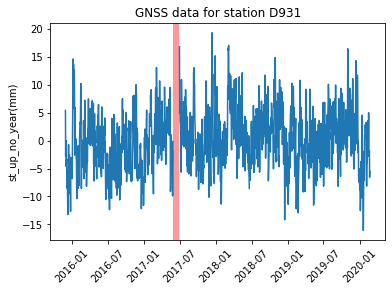

In [9]:
GNSS.plot_gnss_series(gnss.get_df(), 'D931', 'st_up_no_year(mm)',False)

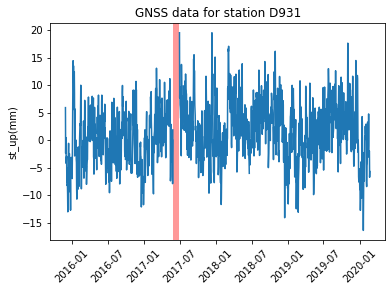

In [10]:
GNSS.plot_gnss_series(gnss.get_df(), 'D931', 'st_up(mm)',False)

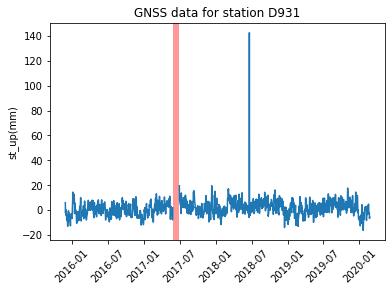

In [11]:
GNSS.plot_gnss_series(gnss.get_df_with_outliers(), 'D931', 'st_up(mm)',False)

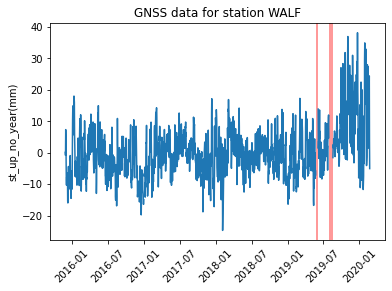

In [12]:
GNSS.plot_gnss_series(gnss.get_df(), 'WALF', 'st_up_no_year(mm)',False)

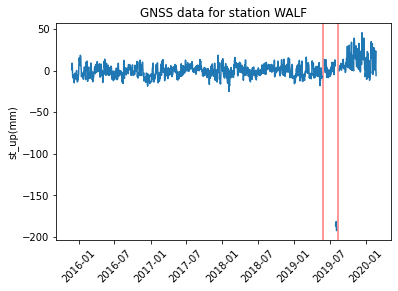

In [13]:
GNSS.plot_gnss_series(gnss.get_df_with_outliers(), 'WALF', 'st_up(mm)',False)

Missing dates:
2016-12-31  -  2016-12-31
2019-05-16  -  2019-05-16
2019-05-24  -  2019-05-24
2019-05-26  -  2019-06-01
2019-07-30  -  2019-08-18


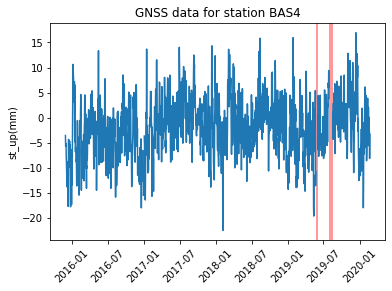

In [14]:
GNSS.plot_gnss_series(gnss.get_df(), 'BAS4', 'st_up(mm)',True)

Missing dates:
2016-12-31  -  2016-12-31
2019-05-26  -  2019-05-26


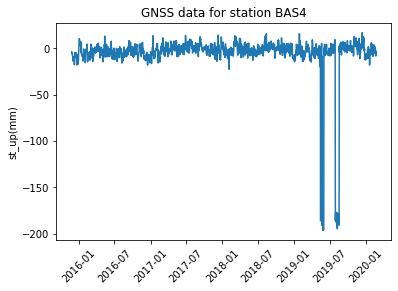

In [15]:
GNSS.plot_gnss_series(gnss.get_df_with_outliers(), 'BAS4', 'st_up(mm)',True)

# Other tests

In [16]:
def zscore(s, window, thresh=3, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)   
    m = z.between(-thresh, thresh)

    if return_all:
        return z, avg, std, m
    return m

def zscore_2(s):
    avg = s.mean()
    std = s.std()
    z = (s-avg)/std
    return z

In [34]:
# this is my only change to your code, the outputs are the same, but without it u cannot run the notebook from scratch
gnss_df = gnss.get_df_with_outliers()

In [35]:
x = gnss_df[gnss_df.site == 'D931']['day']
s = gnss_df[gnss_df.site == 'D931']['st_up(mm)']

In [36]:
s[s>100]

12235    142.73
Name: st_up(mm), dtype: float64

In [37]:
z, avg, std, m = zscore(s,365,return_all=True)
z_2 = zscore_2(s)

In [38]:
z_2[z_2>3]

12235    21.88932
Name: st_up(mm), dtype: float64

In [39]:
z[z>3]

11883     3.317581
12044     3.185869
12235    15.838762
Name: st_up(mm), dtype: float64

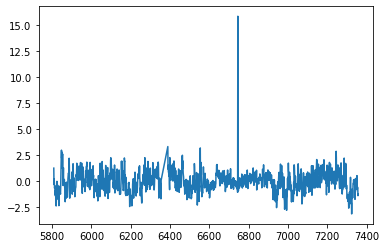

In [40]:
plt.plot(x,z)

In [41]:
x = gnss_df[gnss_df.site == 'BAS4']['day']
s = gnss_df[gnss_df.site == 'BAS4']['st_up(mm)']

In [42]:
z, avg, std, m = zscore(s,365,return_all=True)
z_2 = zscore_2(s)

In [43]:
s[s<-100]

1265   -185.957
1273   -191.121
1275   -187.216
1276   -189.011
1277   -196.295
1278   -193.432
1279   -195.908
1280   -189.201
1339   -185.621
1340   -179.146
1341   -176.466
1342   -187.291
1343   -183.703
1344   -182.079
1345   -182.692
1346   -182.631
1347   -192.555
1348   -177.261
1349   -194.539
1350   -183.848
1351   -180.809
1352   -186.946
1353   -183.166
1354   -178.588
1355   -181.739
1356   -179.893
1357   -179.323
1358   -190.548
Name: st_up(mm), dtype: float64

In [ ]:
z[z<-3]

799    -3.115610
800    -4.068510
1265   -3.453362
1273   -3.558366
1275   -3.479094
1276   -3.515442
1277   -3.663098
1278   -3.604768
1279   -3.655014
1280   -3.518870
1339   -3.443703
1340   -3.312871
1341   -3.258555
1342   -3.478217
1343   -3.405487
1344   -3.372670
1345   -3.385105
1346   -3.383894
1347   -3.585191
1348   -3.274903
1349   -3.625505
1350   -3.408590
1351   -3.346955
1352   -3.471461
1353   -3.394733
1354   -3.301901
1355   -3.366000
1356   -3.328865
1357   -3.317505
1358   -3.545366
Name: st_up(mm), dtype: float64

In [ ]:
z_2[z_2 <-3]

1265   -7.182665
1273   -7.388012
1275   -7.232729
1276   -7.304108
1277   -7.593757
1278   -7.479910
1279   -7.578368
1280   -7.311663
1339   -7.169304
1340   -6.911824
1341   -6.805254
1342   -7.235712
1343   -7.093034
1344   -7.028456
1345   -7.052832
1346   -7.050406
1347   -7.445036
1348   -6.836867
1349   -7.523930
1350   -7.098800
1351   -6.977954
1352   -7.221993
1353   -7.071680
1354   -6.889635
1355   -7.014935
1356   -6.941529
1357   -6.918863
1358   -7.365227
Name: st_up(mm), dtype: float64

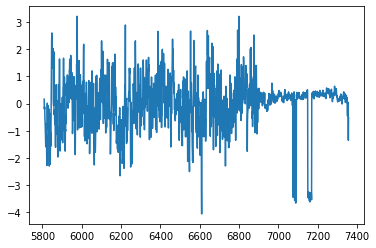

In [ ]:
plt.plot(x,z)

In [ ]:
  def compute_outliers(self, thresh=3):
        


In [124]:
gnss.get_standarized_df()

site  YYMMMDD  yyyy.yyyy  __MJD  week  d  reflon  _e0(m)  __east(m)  \
0      BAS4  15NOV27  2015.9042  57353  1872  5     5.9    2840   0.335746   
1      BAS4  15NOV28  2015.9069  57354  1872  6     5.9    2840   0.338036   
2      BAS4  15NOV29  2015.9097  57355  1873  0     5.9    2840   0.334461   
3      BAS4  15NOV30  2015.9124  57356  1873  1     5.9    2840   0.334722   
4      BAS4  15DEC01  2015.9151  57357  1873  2     5.9    2840   0.335756   
...     ...      ...        ...    ...   ... ..     ...     ...        ...   
49412  WALF  20FEB18  2020.1314  58897  2093  2     6.1    2280   0.337429   
49413  WALF  20FEB19  2020.1342  58898  2093  3     6.1    2280   0.337969   
49414  WALF  20FEB20  2020.1369  58899  2093  4     6.1    2280   0.338318   
49415  WALF  20FEB21  2020.1396  58900  2093  5     6.1    2280   0.338762   
49416  WALF  20FEB22  2020.1424  58901  2093  6     6.1    2280   0.338489   

       ____n0(m)  ...  sig_u(m)  __corr_en  __corr_eu  __corr_nu  \
0        5492790  ...  0.003001   0.008320  -0.051890  -0.051327   
1        5492790  ...  0.003059   0.017230  -0.067490  -0.044838   
2        5492790  ...  0.003027   0.006314  -0.038736  -0.063397   
3        5492790  ...  0.003060   0.007693  -0.037520  -0.062460   
4        5492790  ...  0.003016   0.019456  -0.063112  -0.056829   
...          ...  ...       ...        ...        ...        ...   
49412    5502823  ...  0.002851  -0.008958   0.001673  -0.046057   
49413    5502823  ...  0.002894  -0.004305   0.009617  -0.027913   
49414    5502823  ...  0.002999  -0.033000   0.015142  -0.018189   
49415    5502823  ...  0.002940  -0.032729   0.014884   0.000672   
49416    5502823  ...  0.002883  -0.001912   0.018324  -0.045957   

       _latitude(deg)  _longitude(deg)  __height(m)   day  st_up(mm)  \
0           49.567937         5.939266    375.75093  5809     -3.546   
1           49.567937         5.939266    375.74875  5810     -5.717   
2           49.567937         5.939266    375.74933  5811     -5.137   
3           49.567937         5.939266    375.74901  5812     -5.463   
4           49.567937         5.939266    375.74651  5813     -7.958   
...               ...              ...          ...   ...        ...   
49412       49.658142         6.131582    292.40167  7353      6.138   
49413       49.658142         6.131582    292.41336  7354     17.830   
49414       49.658142         6.131582    292.41906  7355     23.531   
49415       49.658142         6.131582    292.39791  7356      2.379   
49416       49.658142         6.131582    292.38956  7357     -5.970   

       periodic_func(mm)  
0              -2.308077  
1              -2.267066  
2              -2.226888  
3              -2.187554  
4              -2.149077  
...                  ...  
49412          -0.208286  
49413          -0.241110  
49414          -0.273975  
49415          -0.306872  
49416          -0.339790  

[49417 rows x 26 columns]

In [15]:
d = GNSS.compute_periodic_function(gnss, use_sigma=True)

In [16]:
d = d[d.site == 'BAS4']
x = d.day
y = d['periodic_func(mm)']

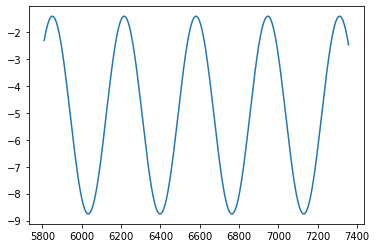

In [17]:
plt.plot(x,y)

In [13]:
site_df = gnss_df[gnss_df.site == 'BAS4']

In [14]:
x = site_df.day
y = site_df['st_up(mm)']

In [28]:
np.pi

3.141592653589793

In [29]:
def f(x,a,b,c):
    return a*np.sin(x*2*np.pi / 365.25) + b*np.cos(x*2*np.pi / 365.25) + c

In [49]:
popt, pcov = curve_fit(f, x, y, sigma=site_df['sig_u(m)']*1000)

In [41]:
x_lin_reg = np.array([np.sin(x*2*np.pi / 365.25), np.cos(x*2*np.pi / 365.25)]).T

In [36]:
x_lin_reg.shape

(1547, 2)

In [42]:
x_lin_reg

array([[-0.56636193,  0.82415664],
       [-0.55210134,  0.83377701],
       [-0.53767738,  0.84315066],
       ...,
       [ 0.75792163,  0.65234562],
       [ 0.76903086,  0.63921165],
       [ 0.77991252,  0.62588853]])

In [43]:
model = LinearRegression()
model.fit(x_lin_reg,y)

LinearRegression()

In [45]:
model.intercept_

-5.559947718422925

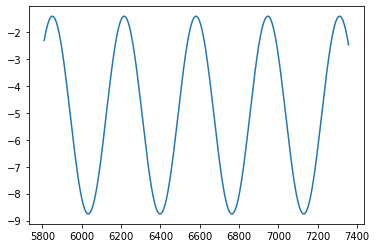

In [52]:
plt.plot(x, f(x, *popt))
#plt.plot(x,y)